
Autonomous University of Chihuahua

Engineeing Faculty

Machine Learning

Assignment : Project Advances 2.2 - Explore and preparation of Database; 2.3 Logistic Regression Implementation

Professor: M.A. Olanda Prieto

Eng. Daniela Alejandra Rubio Vega

MIC P372953

For this project, it is used the Wisconcin's Breast Cancer dataset. It has over 569 instances, with 33 features each. The goal is to classify with the features if the diagnosis of the tumor is Benign (B) or Malignant (M).

From the 569 cases, there are 357 B and 212 M

In [46]:
#Libraries needed are imported

import pandas as pd #data manipulation and analysis
import numpy as np #numerical operations with python
import matplotlib.pyplot as plt #graphs
import seaborn as sns #statistical graphs
import os #for interaction with operating system

In [47]:
#This block is used to ignore all the warning messages that may appear
import warnings
warnings.filterwarnings('ignore')

1. Prepare data set

In [48]:
#The variable for the dataset path is created and then printed
dirname = '/content/drive/MyDrive/breast_cancer.csv'

print(os.path.join(dirname)) #and then printed


/content/drive/MyDrive/breast_cancer.csv


In [49]:
#Read the csv file and making it into a pandas DataFrame to be manipulated
df = pd.read_csv('/content/drive/MyDrive/breast_cancer.csv')

#Show the first rows of the DF and their columns
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [50]:
#It shows the dimensions of the DF created
df.shape #The tuple is the number of rows, and numver of columns

(569, 33)

In [51]:
#It displays the statitics summary for each column of the DF
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [52]:
#It is used to retrieve and print the unique values existing in the column of diagnosis
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [53]:
#It counts how many times each value of diagnosis is present
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [54]:
##1.1-Clean & Prepare data

In [55]:
#Code used to remove the columns id & Unnamed from the DF, due that are not useful in the data analysis
df.drop('id', axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)

In [56]:
#Show the first rows of the DF and their columns
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [57]:
#This code is used to select the diagnosis column, and in there, replace the values 'M' and 'B' with '1' and '0' respectively
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head() ##Show the first rows of the DF and their columns

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [58]:
#This is used to count in all the columns the missing values of each
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

As it is shown above, there are no missing values in the dataset

In [59]:
#This line computes the correlation matrix for the DF
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


The only correlations that will be taken in consideration are those that have a medium to strong (from 0.5 to 1.0) positive or negative relation. So the variables texture_mean, texture_se, smoothness_mean, smoothness_se, compactness_se, concavity_se, symmetry_mean, fractal_dimension_mean, texture_se, texture_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, texture_worst, smoothness_worst, symmetry_worst, and fractal_dimension_worst will be eliminated later.

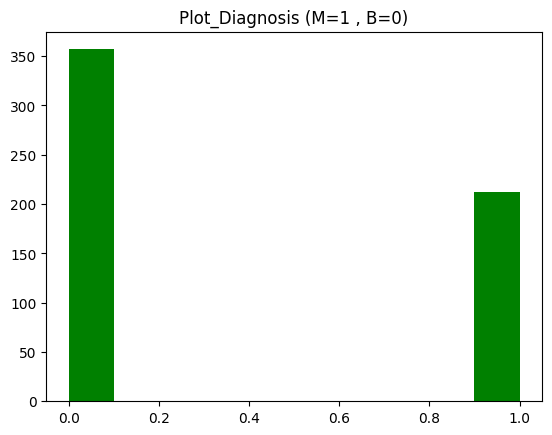

In [60]:
plt.hist(df['diagnosis'], color='g') #Make a histogram of the diagnosis column in color green
plt.title('Plot_Diagnosis (M=1 , B=0)') #This is to make the grpah's title
plt.show() #Display the graph

2. Data augmentation and transformation for databases with images. If you do not have images, analyze relevant characteristics that allow you to identify a better evaluation in the data.

In [61]:
#The next list is created to store the names of the columns that will be elimnated (as mentioned before)
cols_to_drop = ['texture_mean','smoothness_se','smoothness_mean', 'compactness_se', 'concavity_se', 'symmetry_mean', 'fractal_dimension_mean',
                'texture_se', 'texture_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se',
                'texture_worst', 'smoothness_worst', 'symmetry_worst', 'fractal_dimension_worst']
df.drop(cols_to_drop, axis=1, inplace=True) #Here the features nonuseful are dropped from the DF

In [62]:
#See the correlation matrix for the DF
df.corr()

,diagnosis,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
diagnosis,1.000000,0.730029,0.742636,0.708984,0.596534,0.696360,0.776614,0.567134,0.556141,0.548236,0.776454,0.782914,0.733825,0.590998,0.659610,0.793566
radius_mean,0.730029,1.000000,0.997855,0.987357,0.506124,0.676764,0.822529,0.679090,0.674172,0.735864,0.969539,0.965137,0.941082,0.413463,0.526911,0.744214
perimeter_mean,0.742636,0.997855,1.000000,0.986507,0.556936,0.716136,0.850977,0.691765,0.693135,0.744983,0.969476,0.970387,0.941550,0.455774,0.563879,0.771241
area_mean,0.708984,0.987357,0.986507,1.000000,0.498502,0.685983,0.823269,0.732562,0.726628,0.800086,0.962746,0.959120,0.959213,0.390410,0.512606,0.722017
compactness_mean,0.596534,0.506124,0.556936,0.498502,1.000000,0.883121,0.831135,0.497473,0.548905,0.455653,0.535315,0.590210,0.509604,0.865809,0.816275,0.815573
concavity_mean,0.696360,0.676764,0.716136,0.685983,0.883121,1.000000,0.921391,0.631925,0.660391,0.617427,0.688236,0.729565,0.675987,0.754968,0.884103,0.861323
concave points_mean,0.776614,0.822529,0.850977,0.823269,0.831135,0.921391,1.000000,0.698050,0.710650,0.690299,0.830318,0.855923,0.809630,0.667454,0.752399,0.910155
radius_se,0.567134,0.679090,0.691765,0.732562,0.497473,0.631925,0.698050,1.000000,0.972794,0.951830,0.715065,0.719684,0.751548,0.287103,0.380585,0.531062
perimeter_se,0.556141,0.674172,0.693135,0.726628,0.548905,0.660391,0.710650,0.972794,1.000000,0.937655,0.697201,0.721031,0.730713,0.341919,0.418899,0.554897
area_se,0.548236,0.735864,0.744983,0.800086,0.455653,0.617427,0.690299,0.951830,0.937655,1.000000,0.757373,0.761213,0.811408,0.283257,0.385100,0.538166


As shown in the correlation matrix, there are only medium to strong relations now

<Axes: >

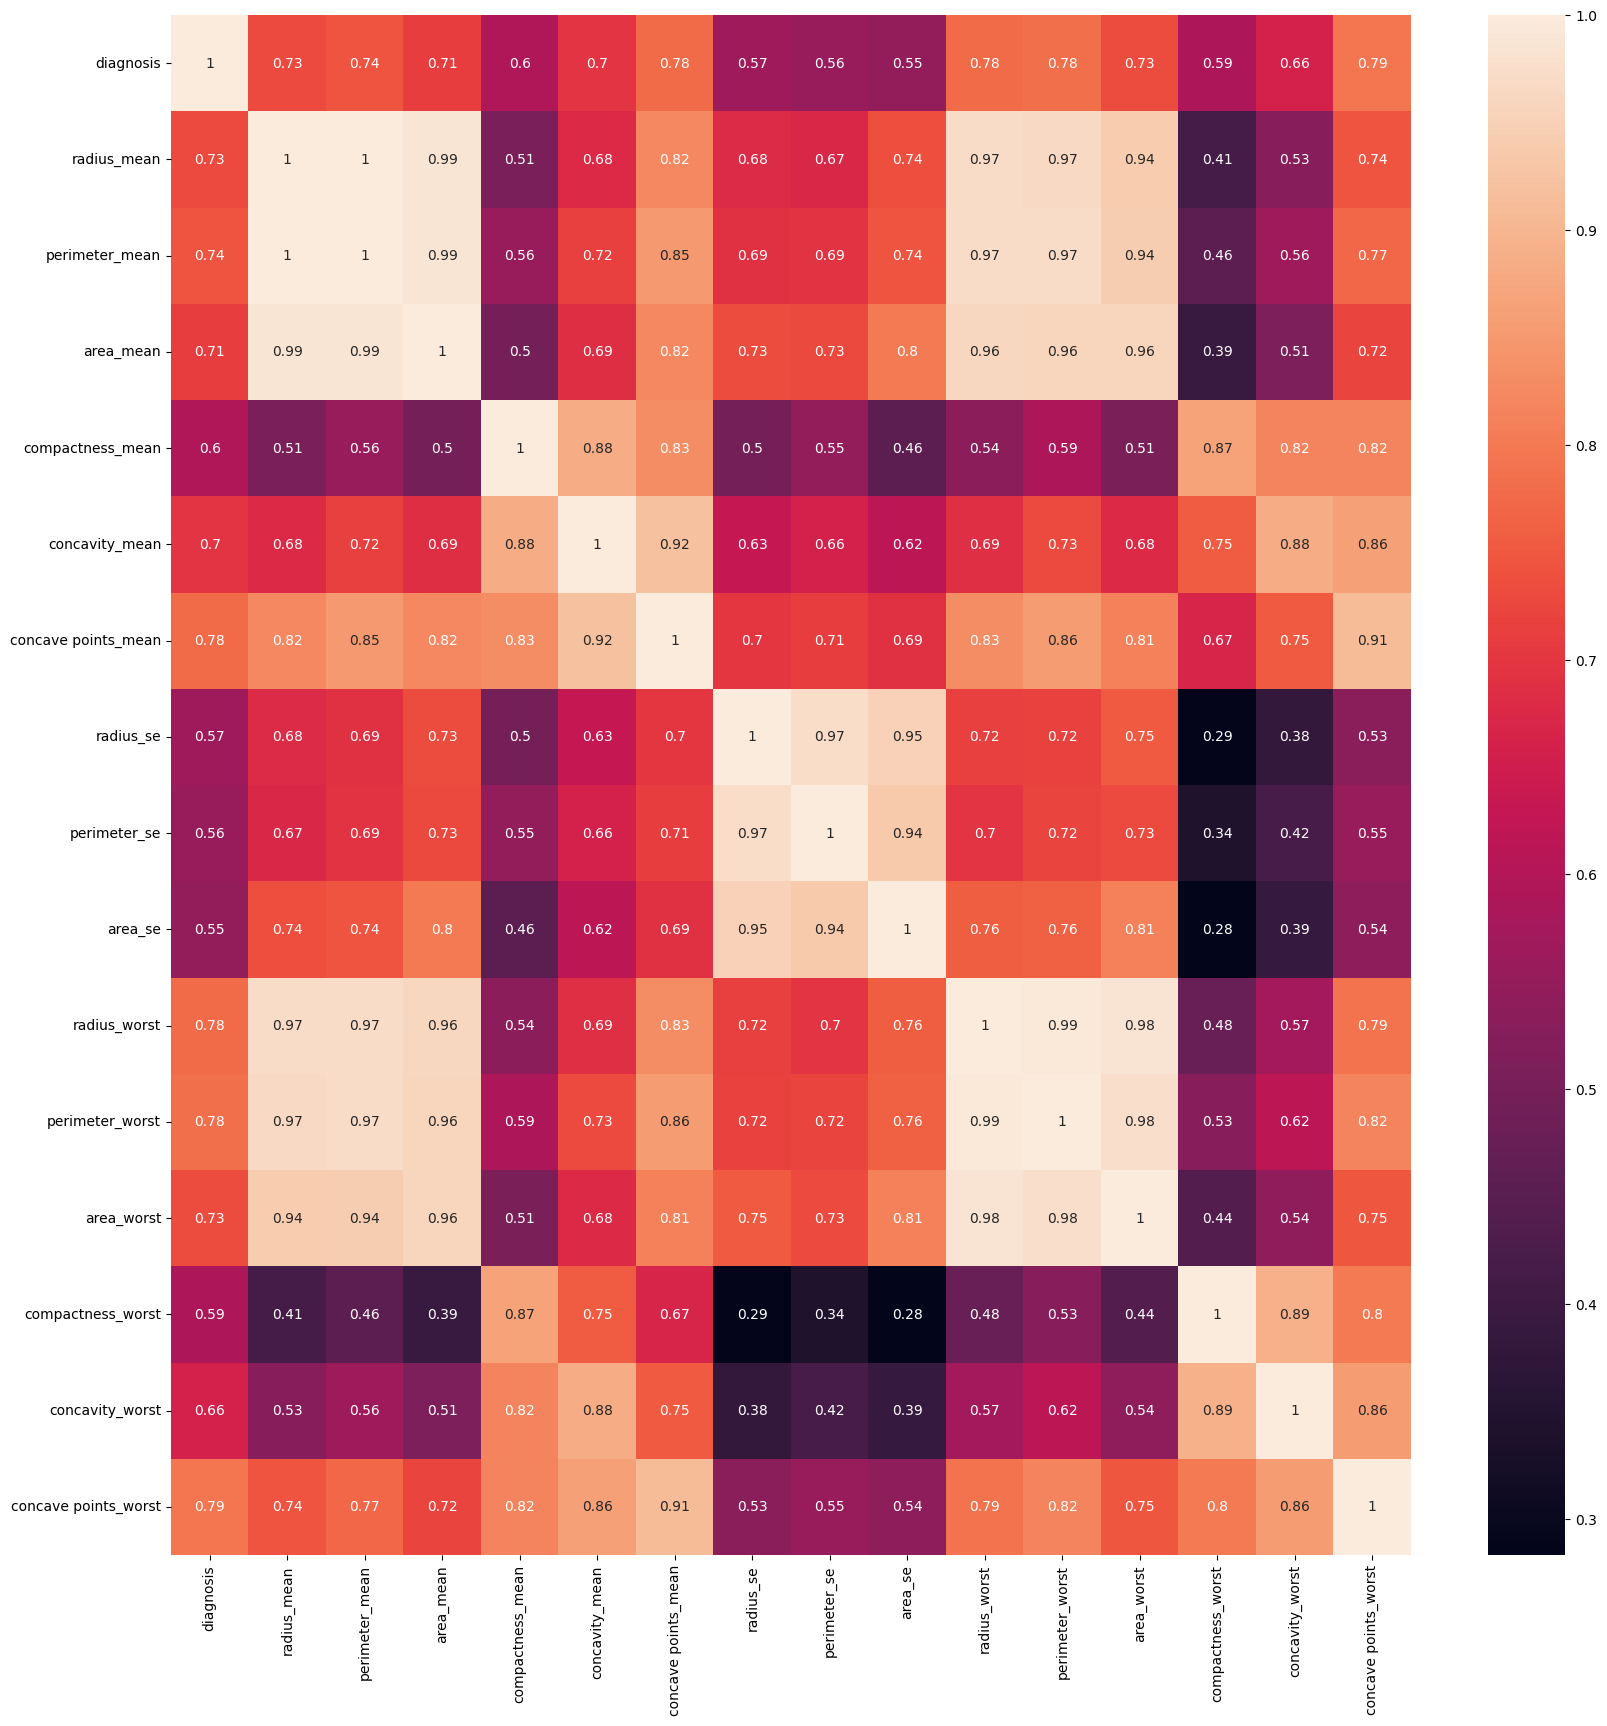

In [63]:
#This block creates a 20 x 20 heatmap of the correlation matrix, with its values inside of the cells
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)


With the heatmap, is easy to check on the presence of multicolinearity amongst some variables. An example would be the readius_mean that has a corrleation of .99 and 11 with area_mean and perimeter_mean.

This does makes sense, because those three features basically are about the size of the tumor, so in some way or another, they have the same information. Another set of variables with multicolinearity are the ones of the 'worst' and 'mean' columns, ie.: area_worst and area_mean have a .96 correlation.

In [64]:
#Create list of clumns that will be dropped: all "worst" columns, and the ones of perimeter and radius
columns = ['radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst',
          'concave points_worst','perimeter_mean','perimeter_se','radius_mean', 'radius_se']
df.drop(columns, axis=1, inplace=True)


In [65]:
#Show the first rows of the DF and their columns
df.head()

,diagnosis,area_mean,compactness_mean,concavity_mean,concave points_mean,area_se
0,1,1001.0,0.27760,0.3001,0.14710,153.40
1,1,1326.0,0.07864,0.0869,0.07017,74.08
2,1,1203.0,0.15990,0.1974,0.12790,94.03
3,1,386.1,0.28390,0.2414,0.10520,27.23
4,1,1297.0,0.13280,0.1980,0.10430,94.44


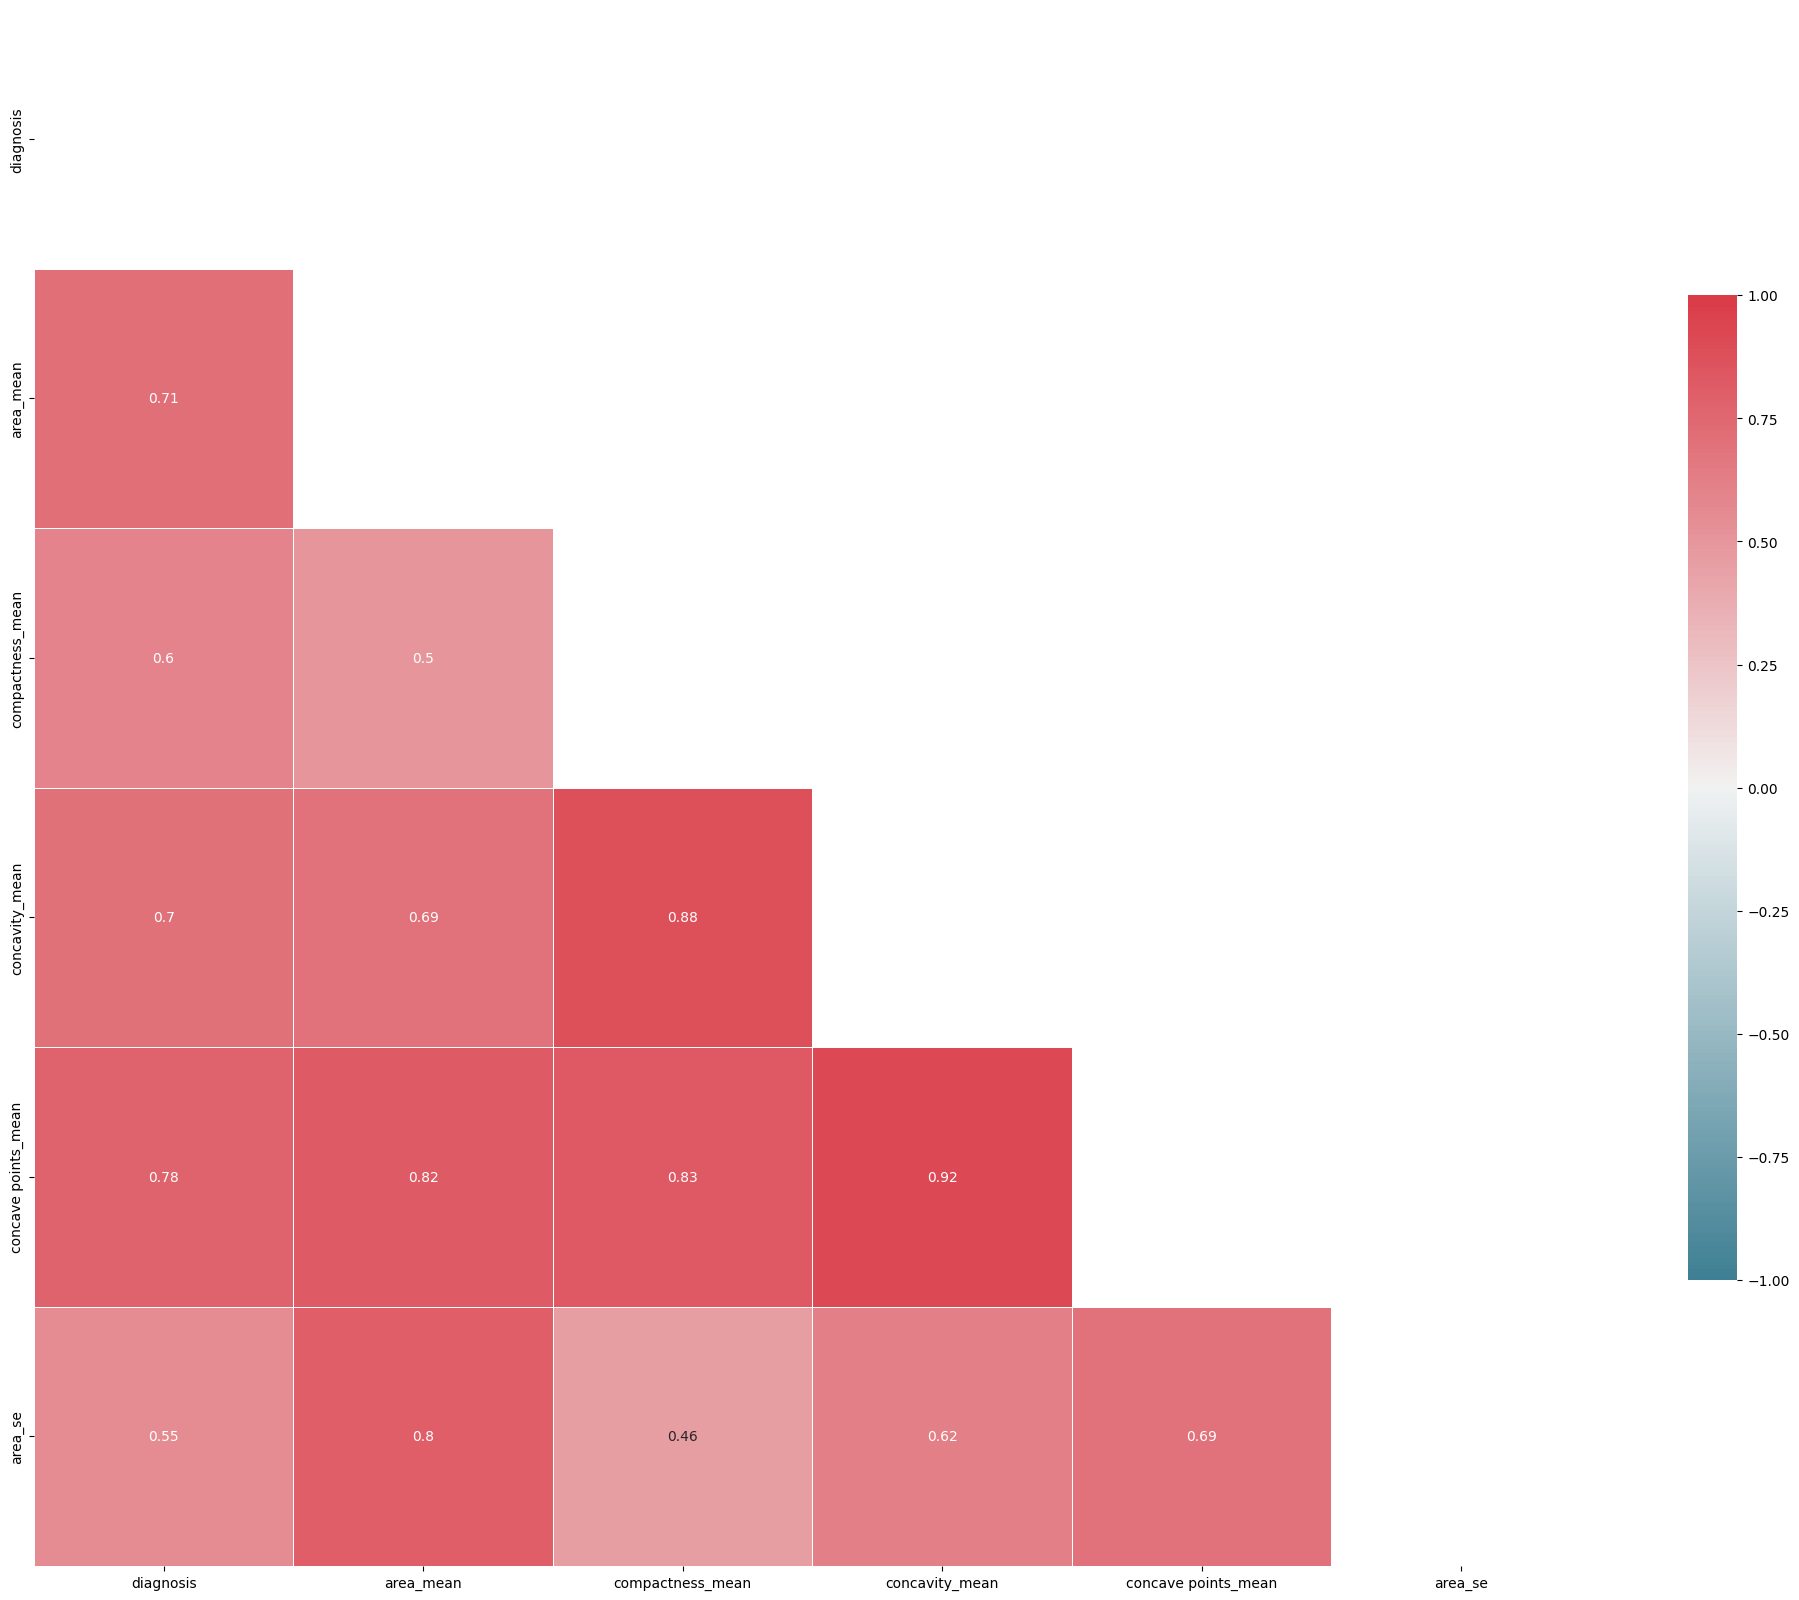

In [66]:
# Draw the heatmap again, with the new correlation matrix
corr = df.corr().round(2) #Calculate correlation matrix and round values to two decimal places
mask = np.zeros_like(corr, dtype=np.bool) #makes a boolean mask withe the shape of corr, the mask creates an array of zeros and specifies that the boolean elements
mask[np.triu_indices_from(mask)] = True #the mask is used to focus on the lower triangle of the correlation matrix

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

f, ax = plt.subplots(figsize=(20, 20)) #new figure and axes with 20 x 20 size
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)  #specifications of heatmap, with color bar shrink to 50%, value inside cell, etc.
plt.tight_layout() #tights and organizes plot

3. Create a data partition for Train and Test with their respective label. (Remember that your partition must be reproducible, that is, if you execute this instruction "n" times it must return the same partitions). *If your database already has an established partition, this is not necessary.

In [67]:
#Drop the diagnosis column and asign it to y variable, converting it into our target
X=df.drop(['diagnosis'],axis=1)
y = df['diagnosis']

In [68]:
#Needed for the data partitition
from sklearn.model_selection import train_test_split

In [69]:
#code used to split the dataset into training set (X_train, y_train) and testing set (X_test,y_test)
#the partition is 30% for testing and 70% for training based on the protocol of Spanhol et al.
#that suggest a 70-30 partition in their Breast Cancer Histopathological Image Classification project.
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)


4. Create a pipeline that performs the data transformation.


In [70]:
#Needed for the creation of the pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler #Needed for the scaling of the data
import joblib  # Imports joblib directly

# Create  pipeline with the transformation of the data through scaling
pipeline = Pipeline([
    ('scaler', StandardScaler())])

#Adjust the  pipeline to the training and testing variables data
X_train = pipeline.fit_transform(X_train)
X_test= pipeline.fit_transform(X_test)

#Show first ten values of scaled training data
X_train[:10]

array([[-0.20861569, -0.7731696 , -0.76231194, -0.93324109, -0.39177533],
       [-0.2965028 , -0.58761605, -0.09198533, -0.54268359, -0.53126109],
       [-0.01024193,  1.57000613,  0.73231958,  0.38658307,  0.18132474],
       [-0.40001429, -0.9706502 , -0.63470419, -0.6549921 , -0.50893518],
       [-0.24153848, -0.7006297 , -0.75034872, -0.63746879, -0.1916614 ],
       [ 0.76260663, -0.78998478, -0.76102558, -0.53285992,  0.07809299],
       [ 0.06899597,  0.12311858, -0.29613201, -0.28248893, -0.42434249],
       [-0.63577495, -0.80132525, -0.76591378, -0.85120012, -0.31824319],
       [-0.04344373, -0.21279397, -0.24596364,  0.4383565 , -0.3051344 ],
       [-0.24767663,  0.07228199, -0.44020528, -0.28169241, -0.28977253]])

5. Save the data transformation (pipeline) in a .sav file.

In [71]:
#This code is to save the pipeline into a file in drive
joblib.dump(pipeline, '/content/drive/MyDrive/FINAL_ML/pipeline_transformer.sav')

['/content/drive/MyDrive/FINAL_ML/pipeline_transformer.sav']



6. Using a GridSearch or RandomizedSearchCV search for the best parameters for your LR model.

In [72]:
#Needed for the ML model and the metrics that are gonna be used
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [73]:
#Logistic Regression model
LR = LogisticRegression()

#Train the LR model on the training data
model_LR= LR.fit(X_train, y_train)

#Uses the trained model (model_LR) ro make predictions on the test dataset, and the values are stored in y_pred
y_pred = model_LR.predict(X_test)

#calculates the accuracy of the model comparing the value predicted and the actual value on the test set
print(metrics.accuracy_score(y_test, y_pred))

0.9122807017543859


In [74]:
#SVM model
svm = SVC(kernel='rbf', random_state=42, gamma=.10, C=1.0)

#Train the SVM model on the training data
model_SVM= svm.fit(X_train, y_train)

#Uses the trained model (model_SVM) ro make predictions on the test dataset, and the values are stored in y_pred
y_pred = model_SVM.predict(X_test)

#calculates the accuracy of the model comparing the value predicted and the actual value on the test set
print(metrics.accuracy_score(y_test, y_pred))

0.9298245614035088


In [75]:
#DecisionTree Model
DT = DecisionTreeClassifier(random_state=42)

#Train the DT model on the training data
model_DT= DT.fit(X_train, y_train)

#Uses the trained model (model_DT) ro make predictions on the test dataset, and the values are stored in y_pred
y_pred = model_DT.predict(X_test)

#calculates the accuracy of the model comparing the value predicted and the actual value on the test set
print(metrics.accuracy_score(y_test, y_pred))

0.9181286549707602


In [76]:
#Dictionary created to have the lists of possible values for the gridsearch
LR = LogisticRegression()
SVM = SVC()
DT = DecisionTreeClassifier()

data = [(LR, [{'C': [0.01, 0.1, 0.5, 1.0], 'random_state':[42]}]),
        (SVM, [{'C': [0.1, 0.5, 1.0], 'kernel': ['linear', 'rbf'], 'random_state':[42]}]),
        (DT, [{'criterion':['gini', 'entropy'], 'max_depth':[None, 10, 20, 30, 40, 50], 'min_samples_split':[2, 5],'min_samples_leaf': [1, 2, 4]}])]

In [77]:
#Needed for GridSearch
from sklearn.model_selection import GridSearchCV

In [78]:
#Performing the gridsearch for hyperparameter tuning
#with their corresponding parameter grids (param_grid)
#Each combination of hyperparameters is evaluated with cross-validation of 10 folds,
#the best hyperparameters are retained in the grid object.

for i,j in data:
  grid = GridSearchCV(estimator = i , param_grid = j , scoring = 'accuracy',cv = 10)
  grid.fit(X_train,y_train) #Fits the gridsearch to the training data

  #Save best score of the grid, and the parameters it used
  best_accuracy = grid.best_score_
  best_parameters = grid.best_params_

  #Print best accuracy of the grid, and the best parameters
  print('{} \nBestAccuracy : {:.2f}%'.format(i,best_accuracy*100))
  print('BestParameters : ',best_parameters)

LogisticRegression() 
BestAccuracy : 92.21%
BestParameters :  {'C': 1.0, 'random_state': 42}
SVC() 
BestAccuracy : 92.46%
BestParameters :  {'C': 0.1, 'kernel': 'linear', 'random_state': 42}
DecisionTreeClassifier() 
BestAccuracy : 90.46%
BestParameters :  {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 5}



7. Once you have identified the best parameters, use these to make your predictions with the Test data. If your models were trained with transformed data (e.g. standard scale), your test data set will need to be transformed.

In [79]:
#Use LogisticRegression with best parameters obtained prior
best_LR = LogisticRegression(C=0.1, random_state=42)
#Fit the training data with the LR model
best_LR.fit(X_train, y_train)
#Use trained model to make predictions on test data
y_pred_LR = best_LR.predict(X_test)

#Use Support Vector Machine with best parameters obtained prior
best_SVM= SVC(C=0.1, kernel='linear', random_state=42)
#Fit the training data with the SVM model
best_SVM.fit(X_train, y_train)
#Use trained model to make predictions on test data
y_pred_SVM = best_SVM.predict(X_test)

#Use DecisionTree with best parameters obtained prior
best_DT = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=4, min_samples_leaf=5)
#Fit the training data with the DT model
best_DT.fit(X_train, y_train)
#Use trained model to make predictions on test data
y_pred_DT = best_DT.predict(X_test)



8. Get your precision, recall and precision, F1 score, confusion matrix and classification report (classification_report).

In [80]:
#Needed for the metrics that are going to be measured
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

#Evaluate Logistic Regression with each king of metric, using the comparison of the prediction and the actual value of the test set
accuracy_LR = accuracy_score(y_test, y_pred_LR)
recall_LR = recall_score(y_test, y_pred_LR, average='weighted')
precision_LR = precision_score(y_test, y_pred_LR, average='weighted')
f1_LR = f1_score(y_test, y_pred_LR, average='weighted')
classification_report_LR = classification_report(y_test, y_pred_LR)

#Print results
print("Logistic Regression:")
print("Accuracy:", accuracy_LR)
print("Recall:", recall_LR)
print("Precision:", precision_LR)
print("F1 Score:", f1_LR)
print("Classification Report:")
print(classification_report_LR)

Logistic Regression:
Accuracy: 0.9181286549707602
Recall: 0.9181286549707602
Precision: 0.9187442289935365
F1 Score: 0.9171882408724514
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       108
           1       0.93      0.84      0.88        63

    accuracy                           0.92       171
   macro avg       0.92      0.90      0.91       171
weighted avg       0.92      0.92      0.92       171



In [81]:
#Create and show a confusion matrix with the prediction and the actual value of the test set
confusion_matrix_LR = confusion_matrix(y_test, y_pred_LR)

confusion_matrix_LR

array([[104,   4],
       [ 10,  53]])

In [82]:
#Evaluate Support Vector Machine with each king of metric, using the comparison of the prediction and the actual value of the test set
accuracy_SVM = accuracy_score(y_test, y_pred_SVM)
recall_SVM = recall_score(y_test, y_pred_SVM, average='weighted')
precision_SVM = precision_score(y_test, y_pred_SVM, average='weighted')
f1_SVM = f1_score(y_test, y_pred_SVM, average='weighted')
classification_report_SVM = classification_report(y_test, y_pred_SVM)

#Print results
print("\nSVM:")
print("Accuracy:", accuracy_SVM)
print("Recall:", recall_SVM)
print("Precision:", precision_SVM)
print("F1 Score:", f1_SVM)
print("Classification Report:")
print(classification_report_SVM)


SVM:
Accuracy: 0.9239766081871345
Recall: 0.9239766081871345
Precision: 0.9237790422000948
F1 Score: 0.9235702018159332
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       108
           1       0.92      0.87      0.89        63

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171



In [83]:
#Create and show a confusion matrix with the prediction and the actual value of the test set
confusion_matrix_SVM = confusion_matrix(y_test, y_pred_SVM)

confusion_matrix_SVM

array([[103,   5],
       [  8,  55]])

In [84]:
#Evaluate Decision Tree with each king of metric, using the comparison of the prediction and the actual value of the test set
accuracy_DT = accuracy_score(y_test, y_pred_DT)
recall_DT = recall_score(y_test, y_pred_DT, average='weighted')
precision_DT = precision_score(y_test, y_pred_DT, average='weighted')
f1_DT = f1_score(y_test, y_pred_DT, average='weighted')
classification_report_DT = classification_report(y_test, y_pred_DT)


#Print results
print("\nDecision Tree:")
print("Accuracy:", accuracy_DT)
print("Recall:", recall_DT)
print("Precision:", precision_DT)
print("F1 Score:", f1_DT)
print("Classification Report:")
print(classification_report_DT)


Decision Tree:
Accuracy: 0.9064327485380117
Recall: 0.9064327485380117
Precision: 0.9061424748311457
F1 Score: 0.9057494705467094
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       108
           1       0.90      0.84      0.87        63

    accuracy                           0.91       171
   macro avg       0.90      0.89      0.90       171
weighted avg       0.91      0.91      0.91       171



In [85]:
#Create and show a confusion matrix with the prediction and the actual value of the test set
confusion_matrix_DT = confusion_matrix(y_test, y_pred_DT)

confusion_matrix_DT

array([[102,   6],
       [ 10,  53]])

9. Store your trained model in a .sav file.



In [86]:
#Assign the path of where the files will be stored
LR_model_file = '/content/drive/MyDrive/FINAL_ML/LR_model.sav'
SVM_model_file = '/content/drive/MyDrive/FINAL_ML/SVM_model.sav'
DT_model_file = '/content/drive/MyDrive/FINAL_ML/DT_model.sav'


#Save the trained models as a .sav files
joblib.dump(best_LR, LR_model_file)
joblib.dump(best_SVM, SVM_model_file)
joblib.dump(best_DT, DT_model_file)

['/content/drive/MyDrive/FINAL_ML/DT_model.sav']

In [42]:
#Libraries needed for ensamble
from sklearn.ensemble import VotingClassifier

#Create the ensamble of voting classifier
VC = VotingClassifier(
    #The estimators argument is a list of tuples where each tuple contains the name of the base classifier and the base classifier itself
    estimators=[("Logistic Regression",best_LR), ("Support Vector Machine",best_SVM), ("Decision Tree",best_DT)],
    #The argument voting='hard' indicates that the majority vote will be used for the prediction.
    voting='hard')

#Create a loop that iterates over a list containing the base classifiers and the voting classifier
for clf, label in zip([best_LR, best_SVM, best_DT, VC], ['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'Voting Classifier']):
    #For each classifier, cross validation is calculated using 5 partitions and measuring accuracy
    scores = cross_val_score(clf, X_test, y_test, scoring='accuracy', cv=5)
    #Show the mean precision and standard deviation of the cross-validation scores for each classifier
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.92 (+/- 0.04) [Logistic Regression]
Accuracy: 0.92 (+/- 0.02) [Support Vector Machine]
Accuracy: 0.94 (+/- 0.02) [Decision Tree]
Accuracy: 0.94 (+/- 0.03) [Voting Classifier]


In [43]:
best_VC = VC
#Fit the training data with the VC model
best_VC.fit(X_train, y_train)
#Use trained model to make predictions on test data
y_pred_VC = best_VC.predict(X_test)

In [44]:
#Evaluate Ensemble with each king of metric, using the comparison of the prediction and the actual value of the test set
accuracy_VC = accuracy_score(y_test, y_pred_VC)
recall_VC = recall_score(y_test, y_pred_VC, average='weighted')
precision_VC = precision_score(y_test, y_pred_VC, average='weighted')
f1_VC = f1_score(y_test, y_pred_VC, average='weighted')
classification_report_VC = classification_report(y_test, y_pred_VC)


#Print results
print("\Ensemble:")
print("Accuracy:", accuracy_VC)
print("Recall:", recall_VC)
print("Precision:", precision_VC)
print("F1 Score:", f1_VC)
print("Classification Report:")
print(classification_report_VC)

\Ensemble:
Accuracy: 0.9181286549707602
Recall: 0.9181286549707602
Precision: 0.9187442289935365
F1 Score: 0.9171882408724514
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       108
           1       0.93      0.84      0.88        63

    accuracy                           0.92       171
   macro avg       0.92      0.90      0.91       171
weighted avg       0.92      0.92      0.92       171



In [45]:
#Assign the path of where the file will be stored, and save it as a .sav file
VC_model_file = '/content/drive/MyDrive/FINAL_ML/VC_model.sav'

joblib.dump(VC, VC_model_file)

['/content/drive/MyDrive/FINAL_ML/VC_model.sav']

**References:**

Spanhol, F.A., Oliveira, L.S., Petitjean, C., Heutte, L.(2016). A dataset for breast cancer histopathological image classification. IEEE Trans. Biomed. Eng. 63(7), 1455–1462. https://doi.org/10.1109/TBME.2015.2496264
